In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import io, color, measure
from skimage.segmentation import clear_border
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go



In [3]:
# Corrected file path
img = cv2.imread(r"D:\FYP\Morphology\cancer cell morph_bf2211_1\cancer cell morph_bf2211_1\bf_cropped\tile_x008_y011.jpg", 0)

# Check if the image was loaded successfully
if img is None:
	raise FileNotFoundError("Image file not found. Please check the file path.")

#denoised = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)

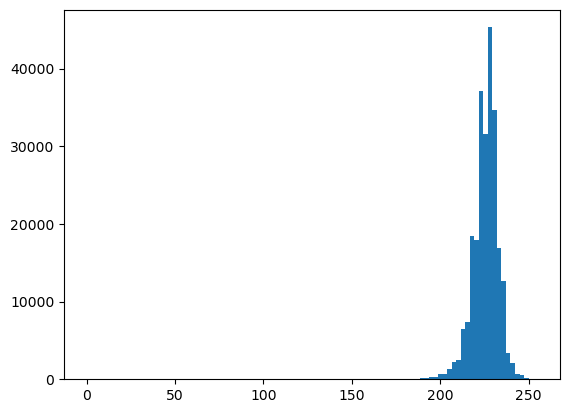

In [4]:
plt.hist(img.flat, bins=100, range=(0,255))
# ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)

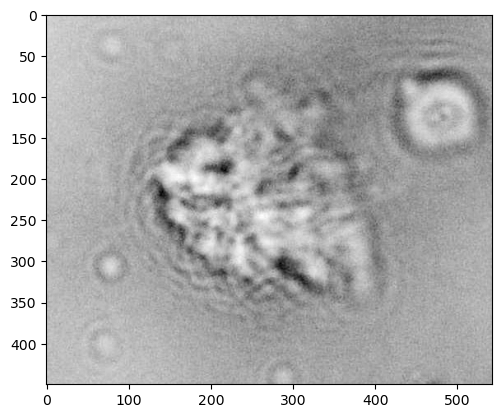

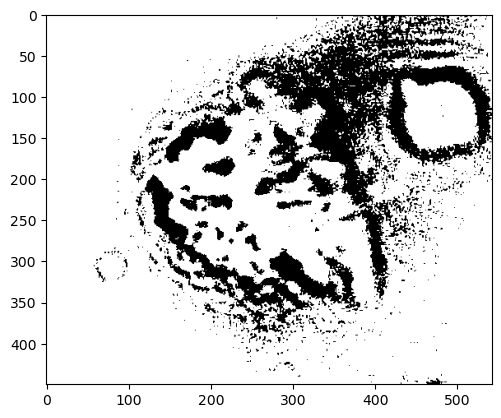

In [5]:
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(thresh, cmap='gray')
plt.show()


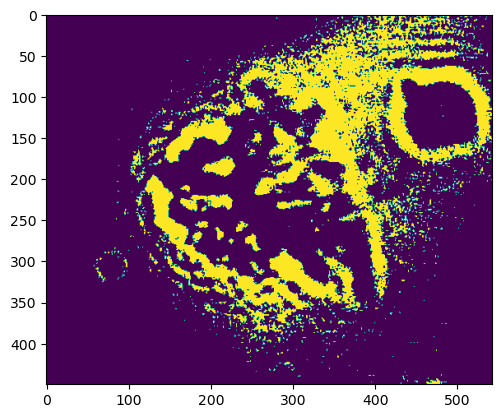

In [6]:
mask = thresh < 210
plt.imshow(mask)
plt.show()

In [7]:
mask.shape

(450, 542)

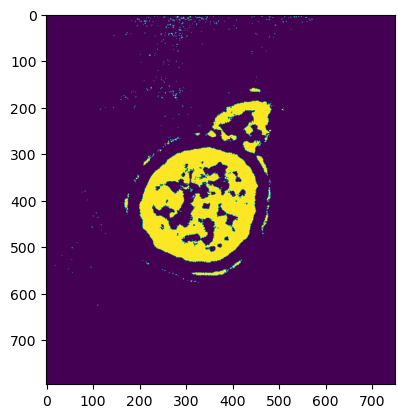

In [39]:
mask = np.vectorize(clear_border, signature='(n,m)->(n,m)')(mask)
plt.imshow(mask)
plt.show()

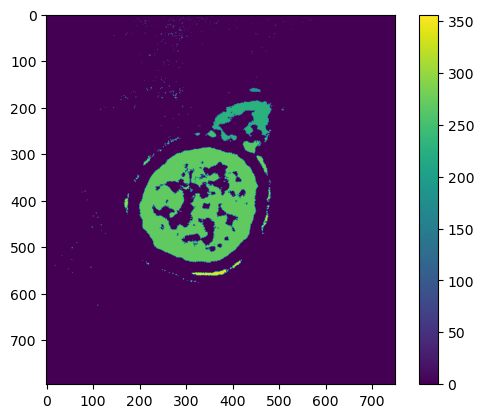

In [40]:
mask_labeled = np.vectorize(label, signature='(n,m)->(n,m)')(mask)
plt.imshow(mask_labeled)
plt.colorbar()
plt.show()

In [41]:
slc = mask_labeled
rps = regionprops(slc)
areas = [r.area for r in rps]


In [43]:
np.argsort(areas)[::-1]

array([268, 226, 262, 341, 276, 248, 315, 303, 194, 334, 277, 292, 290,
       252, 249, 280, 306, 256, 294, 298, 263, 260,   8,  26, 300, 110,
       309, 222, 211, 122, 270,  59, 282,  52, 336,  25, 253,  30,  13,
       352,   2, 239, 283,  76, 165, 142,  34, 343, 323, 311, 353,  85,
       190, 313, 121,  40, 284,  47, 221,  37,  39,  80, 199, 275,  31,
       273,  29, 101, 102, 126,  17,  41, 348, 332,  83, 251,  12, 152,
       219, 214, 208, 310, 265, 350,  22, 197,  24,  91,   1,  81,  95,
        21, 140,  61, 191, 159, 116, 196, 203,  44,  74, 189, 227,   4,
       344,  48, 347, 209,  65,  49,  51, 200,  62,  54, 231,  14, 286,
       285,  10, 264, 259, 327, 267, 318,  15, 130, 321,  60, 109, 147,
       146, 119, 129,  63, 193, 188, 134,  89, 135, 136, 139,  98, 123,
       124,  72, 157, 161,  78,  82,  99, 167, 170,  69, 149, 103, 176,
        66, 104, 150, 118, 182, 141, 355, 258,  43,  42, 238, 240, 242,
       328,  11, 320, 317, 316,  32, 195, 261, 312, 266, 271,  2

In [44]:
slc = mask_labeled
rps = regionprops(slc)
areas = [r.area for r in rps]
idxs = np.argsort(areas)[::-1] # we want largest to smallest

In [45]:
idxs

array([268, 226, 262, 341, 276, 248, 315, 303, 194, 334, 277, 292, 290,
       252, 249, 280, 306, 256, 294, 298, 263, 260,   8,  26, 300, 110,
       309, 222, 211, 122, 270,  59, 282,  52, 336,  25, 253,  30,  13,
       352,   2, 239, 283,  76, 165, 142,  34, 343, 323, 311, 353,  85,
       190, 313, 121,  40, 284,  47, 221,  37,  39,  80, 199, 275,  31,
       273,  29, 101, 102, 126,  17,  41, 348, 332,  83, 251,  12, 152,
       219, 214, 208, 310, 265, 350,  22, 197,  24,  91,   1,  81,  95,
        21, 140,  61, 191, 159, 116, 196, 203,  44,  74, 189, 227,   4,
       344,  48, 347, 209,  65,  49,  51, 200,  62,  54, 231,  14, 286,
       285,  10, 264, 259, 327, 267, 318,  15, 130, 321,  60, 109, 147,
       146, 119, 129,  63, 193, 188, 134,  89, 135, 136, 139,  98, 123,
       124,  72, 157, 161,  78,  82,  99, 167, 170,  69, 149, 103, 176,
        66, 104, 150, 118, 182, 141, 355, 258,  43,  42, 238, 240, 242,
       328,  11, 320, 317, 316,  32, 195, 261, 312, 266, 271,  2

In [46]:
new_slc = np.zeros_like(slc)

In [47]:
new_slc = np.zeros_like(slc)
for i in idxs[:1]:
    new_slc[tuple(rps[i].coords.T)] = i+1

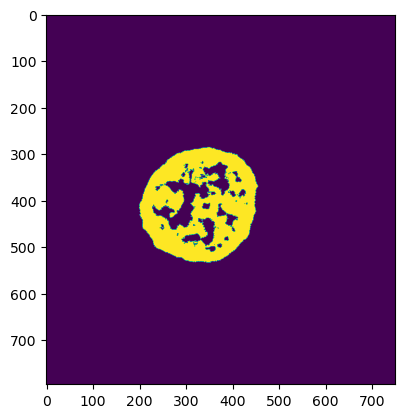

In [48]:
plt.imshow(new_slc)
plt.show()

In [49]:
mask = mask_labeled > 0
mask.shape

(795, 749)

In [50]:
new_slc_filled = np.vectorize(ndi.binary_fill_holes, signature='(n,m)->(n,m)')(new_slc)

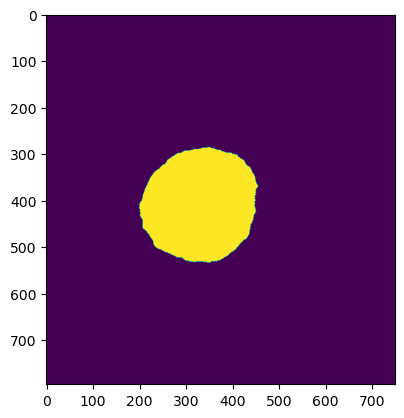

In [51]:
plt.imshow(new_slc_filled)
plt.show()

In [28]:
pixels_to_um = 0.5 #0.454

In [ ]:
properties = ['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity', 'extent', 'eccentricity', 'orientation', 'major_axis_length', 'minor_axis_length', 'perimeter', 'centroid']


In [31]:
import pandas as pd
labeled_image = measure.label(new_slc_filled)
feature = measure.regionprops_table(
    labeled_image,
    properties=('label', 'area', 'centroid', 'equivalent_diameter', 
                'major_axis_length', 'minor_axis_length', 
                'orientation', 'perimeter')
)
features_df = pd.DataFrame(feature)

# Display the DataFrame
print(features_df)



   label     area  centroid-0  centroid-1  equivalent_diameter  \
0      1  47488.0  409.534914  329.917727           245.893472   

   major_axis_length  minor_axis_length  orientation   perimeter  
0         256.029273         236.751152     -0.89089  874.879292  


In [ ]:
# Conversion factor
pixels_to_um = 0.454

# Convert properties in the DataFrame
for index, feature_prop in features_df.iterrows():  # Iterate over rows
    for prop in features_df.columns:  # Iterate over column names
        if prop == 'area':
            features_df.at[index, prop] = feature_prop[prop] * (pixels_to_um ** 2)
        elif prop in ['perimeter', 'centroid-0', 'centroid-1', 'equivalent_diameter', 
                      'major_axis_length', 'minor_axis_length', 'orientation']:
            features_df.at[index, prop] = feature_prop[prop] * pixels_to_um

# Area of the region i.e. number of pixels of the region scaled by pixel-area.
# Perimeter of object which approximates the contour as a line through the centers of border pixels using a 4-connectivity.
#
# Display the converted DataFrame
print(features_df)

   label         area  centroid-0  centroid-1  equivalent_diameter  \
0      1  9788.036608  185.928851  149.782648           111.635636   

   major_axis_length  minor_axis_length  orientation   perimeter  
0          116.23729         107.485023    -0.404464  397.195199  
